In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl

In [ ]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # 사인 곡선 1
  series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + 사인 곡선 2
  series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + 잡음
  return series[..., np.newaxis].astype(np.float32)

In [ ]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
y_pred = X_valid[:, 1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.24933779

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[50, 1]),
                                 keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse",
              optimizer="adam")

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1808 - val_loss: 0.0639
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0480 - val_loss: 0.0358
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0294 - val_loss: 0.0241
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0207 - val_loss: 0.0179
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0160 - val_loss: 0.0140
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0132 - val_loss: 0.0118
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0088 - val_loss: 0.0080
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0078 - val_loss: 0.0072

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0041


0.004146835766732693

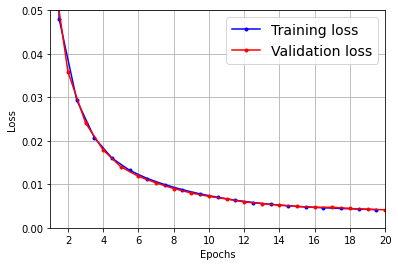

In [ ]:
def plot_learning_curves(loss, val_loss):
  plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
  plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
  plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
  plt.axis([1, 20, 0, 0.05])
  plt.legend(fontsize=14)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

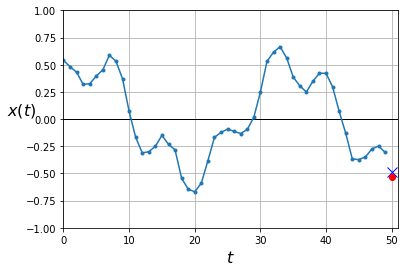

In [ ]:
y_pred = model.predict(X_valid)

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

In [ ]:
model.compile(loss="mse",
              optimizer=keras.optimizers.Adam(lr=0.005))

history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0035

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0038


0.0037611168809235096

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20, return_sequences=True),
                                 keras.layers.SimpleRNN(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.05))
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20),
                                 keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.05))
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))

In [ ]:
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20),
                                 keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.05))
history = model.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 22s 102ms/step - loss: 0.0728 - val_loss: 0.0590
Epoch 2/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0497 - val_loss: 0.0463
Epoch 3/20
219/219 [==============================] - 23s 104ms/step - loss: 0.0489 - val_loss: 0.0565
Epoch 4/20
219/219 [==============================] - 22s 103ms/step - loss: 0.0894 - val_loss: 0.1307
Epoch 5/20
219/219 [==============================] - 22s 103ms/step - loss: 0.1295 - val_loss: 0.1025
Epoch 6/20
219/219 [==============================] - 22s 100ms/step - loss: 0.1145 - val_loss: 0.1011
Epoch 7/20
219/219 [==============================] - 23s 103ms/step - loss: 0.1184 - val_loss: 0.1087
Epoch 8/20
219/219 [==============================] - 22s 101ms/step - loss: 0.1115 - val_loss: 0.1176
Epoch 9/20
219/219 [==============================] - 22s 102ms/step - loss: 0.1180 - val_loss: 0.1022
Epoch 10/20
219/219 [==============================] - 22s 101ms/step - l

In [ ]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

In [ ]:
Y_pred

array([[[ 0.17691426],
        [ 0.16188362],
        [ 0.10850486],
        [ 0.02437721],
        [-0.0613035 ],
        [-0.11064747],
        [-0.12635808],
        [-0.14506951],
        [-0.10393228],
        [-0.09790909]]], dtype=float32)

In [ ]:
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
  Y[:, :, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20, return_sequences=True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 23s 105ms/step - loss: 0.0435 - last_time_step_mse: 0.0436 - val_loss: 0.0019 - val_last_time_step_mse: 0.0038
Epoch 2/20
219/219 [==============================] - 22s 102ms/step - loss: 0.0020 - last_time_step_mse: 0.0048 - val_loss: 0.0079 - val_last_time_step_mse: 0.0248
Epoch 3/20
219/219 [==============================] - 22s 100ms/step - loss: 0.0017 - last_time_step_mse: 0.0042 - val_loss: 0.0012 - val_last_time_step_mse: 0.0023
Epoch 4/20
219/219 [==============================] - 23s 103ms/step - loss: 9.3426e-04 - last_time_step_mse: 0.0017 - val_loss: 6.6280e-04 - val_last_time_step_mse: 6.9002e-04
Epoch 5/20
219/219 [==============================] - 23s 103ms/step - loss: 0.0011 - last_time_step_mse: 0.0022 - val_loss: 7.6506e-04 - val_last_time_step_mse: 0.0013
Epoch 6/20
219/219 [==============================] - 23s 103ms/step - loss: 8.2332e-04 - last_time_step_mse: 0.0015 - val_loss: 5.4608e-04 - val_last_time_ste

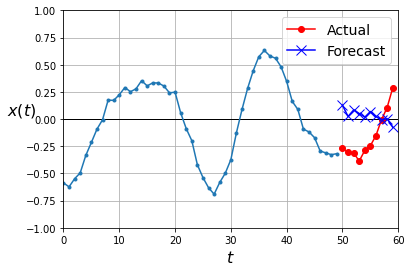

In [ ]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [ ]:
class LNSimpleRNNCell(keras.layers.Layer):
  def __init__(self, units, activation="tanh", **kwargs):
    super().__init__(**kwargs)
    self.state_size = units
    self.output_size = units
    self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, 
                                                      activation=None)
    self.layer_norm = keras.layers.LayerNormalization()
    self.activation = keras.activations.get(activation)

  def call(self, inputs, states):
    outputs, new_states = self.simple_rnn_cell(inputs, states)
    norm_outputs = self.activation(self.layer_norm(outputs))
    return norm_outputs, [norm_outputs]

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                                                        input_shape=[None, 1]),
                                 keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
# LSTM
# 장단기 메모리 셀
model = keras.models.Sequential([
                                 keras.layers.LSTM(20, return_sequences=True, 
                                                   input_shape=[None, 1]),
                                 keras.layers.LSTM(20, return_sequences=True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
# 범용 목적의 RNN층에 매개변수로 LSTM 설정
model = keras.models.Sequential([
                                 keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True,
                                                  input_shape=[None, 1]),
                                 keras.layers.RNN(keras.layers.LSTMCell(20), return_sequences=True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv1D(filters=20, kernel_size=4,
                                                     strides=2, padding="valid",
                                                     input_shape=[None,1]),
                                 keras.layers.GRU(20, return_sequences=True),
                                 keras.layers.GRU(20, return_sequences=True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])

NameError: ignored

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
  model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding="causal",
                                activation="relu", dilation_rate=rate))
model.add(keras.layers.Conv1D(filter=10, kernel_size=1))